In [1]:
pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Generate

In [16]:
from DataGenerate import *

word_pairs, word_pairs_annotations = GetWordPairs()
print("First 5 Word Pairs: ")
print(word_pairs[:5])

word_list = GetWords()
print("\nFirst 5 Words: ")
word_list[:5]

First 5 Word Pairs: 
[['party', 'government'], ['official', 'leader'], ['state', 'government'], ['control', 'intervention'], ['tax', 'interest']]

First 5 Words: 


['development', 'plan', 'action', 'training', 'education']

# Word2Vec

In [4]:
from Models import W2VModel

dimensions = [10,20,30,40,50,60,70,80,90] + list(np.arange(100,800,100))

for vector_dims in dimensions: W2VModel(vector_dims, printing=True)

W2V = W2VModel(768)
print("First 10 dims of second word in 768 dims: ")
W2V.getvector(word_list[1])[:10]

Load Word2Vec Model of  10  dimensions
Load Word2Vec Model of  20  dimensions
Load Word2Vec Model of  30  dimensions
Load Word2Vec Model of  40  dimensions
Load Word2Vec Model of  50  dimensions
Load Word2Vec Model of  60  dimensions
Load Word2Vec Model of  70  dimensions
Load Word2Vec Model of  80  dimensions
Load Word2Vec Model of  90  dimensions
Load Word2Vec Model of  100  dimensions
Load Word2Vec Model of  200  dimensions
Load Word2Vec Model of  300  dimensions
Load Word2Vec Model of  400  dimensions
Load Word2Vec Model of  500  dimensions
Load Word2Vec Model of  600  dimensions
Load Word2Vec Model of  700  dimensions
First 10 dims of second word in 768 dims: 


array([-0.111239  , -0.11238351, -0.02475715,  0.07736997,  0.05225196,
       -0.10167263, -0.11997304, -0.03647869, -0.14775316,  0.01629074],
      dtype=float32)

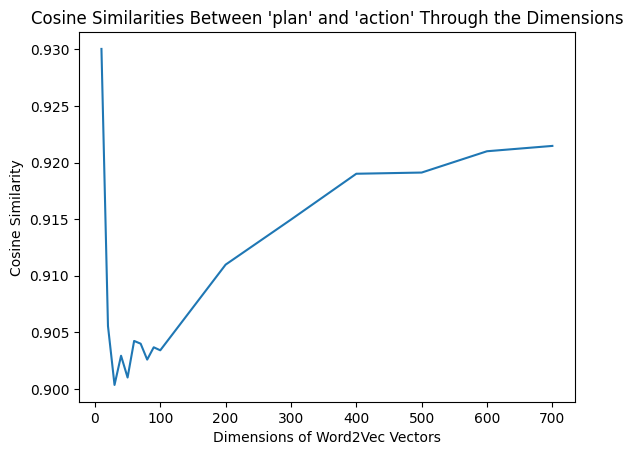

In [5]:
def PlotWord2VecThroughDims(word1, word2):
	dot_prds = []
	for dims in dimensions:
		model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims))
		dim_dot_prod = []
		dim_dot_prod.append(1-cosine(model.wv[word1],model.wv[word2]))
		dot_prds.append(dim_dot_prod)
	dot_prods = np.array(dot_prds)
	plt.plot(dimensions, dot_prods)
	plt.title("Cosine Similarities Between '"+ word1+ "' and '"+ word2+ "' Through the Dimensions")
	plt.ylabel("Cosine Similarity")
	plt.xlabel("Dimensions of Word2Vec Vectors")
	plt.savefig('Cosine_Similarities_Between_'+ word1+ '_and_'+ word2+ '_Through_the_Dimensions.png')
	plt.show()
	return

PlotWord2VecThroughDims(word_list[1], word_list[2])

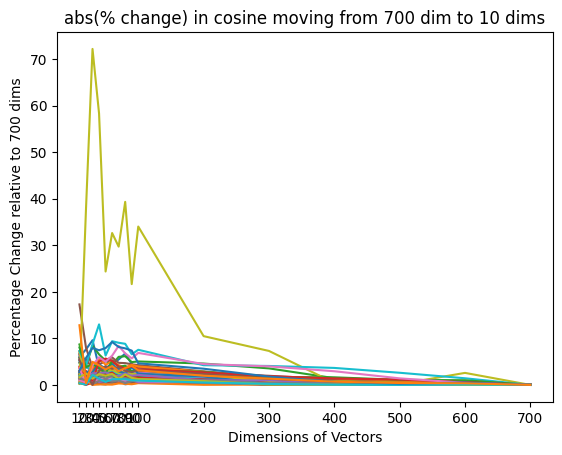

In [6]:
def PlotAllPairsThroughDims():
	#Similarities through dimensions
	dim_similarities = []
	for dims in dimensions:
		model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims))
		dim_specific_similarities = []
		for pair in word_pairs:
			dim_specific_similarities.append(1-cosine(model.wv[pair[0]],model.wv[pair[1]]))
		dim_similarities.append(dim_specific_similarities)
	dim_similarities = np.array(dim_similarities).T #Transpose makes the first index a series of similarities for the same word pair through dimensions

	#Scale similarities to get absolute error from 700 dims
	for pair_index, pair_similarity_series in enumerate(dim_similarities):
		for sim_index, sim in enumerate(pair_similarity_series):
			if sim_index == len(pair_similarity_series)-1: dim_similarities[pair_index, sim_index] = 0
			else:
				dim_similarities[pair_index, sim_index] = abs(100* (sim - dim_similarities[pair_index, -1]) / dim_similarities[pair_index, -1])

		plt.plot(dimensions, dim_similarities[pair_index])
	plt.title("abs(% change) in cosine moving from 700 dim to 10 dims")
	plt.xticks(dimensions)
	plt.xlabel("Dimensions of Vectors")
	plt.ylabel("Percentage Change relative to 700 dims")
	plt.savefig('abs(% change) in cosine moving from 700 dim to 10 dims.png')
	plt.show()
	return 

PlotAllPairsThroughDims()

In [40]:
from scipy.stats import spearmanr

W2V_768 = W2VModel(768)

corrs, BERT_similarities = [], []
#print(len(word_pairs))
all_dim_sims = []
for dim in dimensions:
	W2V_similarities = []
	W2V_dim = W2VModel(dim, printing=False)
	for pair in word_pairs:
		W2V_similarities.append(1-cosine(W2V_dim.getvector(pair[0]), W2V_dim.getvector(pair[1])))
	all_dim_sims.append(W2V_similarities)
	#print(len(word_pairs_annotations), len(W2V_similarities))
	corrs.append([spearmanr(word_pairs_annotations, W2V_similarities)[0], spearmanr(word_pairs_annotations, W2V_similarities)[1]])

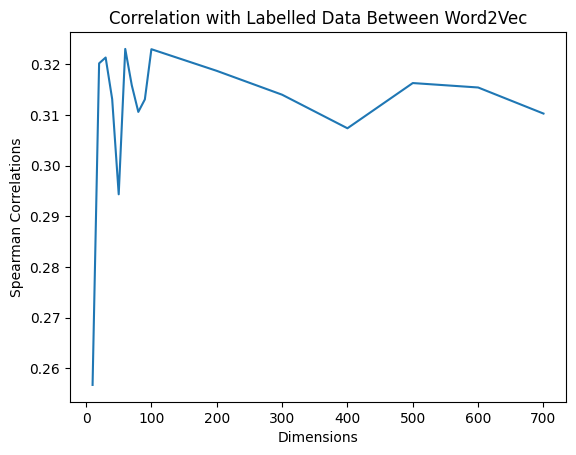

In [56]:
plt.title("Correlation with Labelled Data Between Word2Vec")
plt.xlabel("Dimensions")
plt.ylabel("Spearman Correlations")
plt.plot(dimensions, np.array(corrs)[:, 0])